<a href="https://colab.research.google.com/github/cataa0/ADA-informes/blob/main/kruskal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1.Descripcion del problema

## Problema de optimizacion

El objetivo de un problema de optimizacion es encontrar el camino mas factible entre todas las soliciones posibles.

**Entrada**: Grafo **conectado no dirigido** $G=(V,E)$ y un costo real $c_e$ para cara arco $e\in E$.

**Salida**: Un árbol recubridor $T\in E$ de $G$ con el mínimo coste $\sum\limits_{e\in T}c_e$.

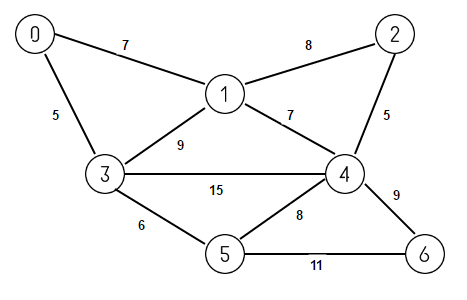

## Algoritmo Greedy 

Es una estrategia de búsqueda por la cual se sigue una heurística (estrategia que guían el descubrimiento) consistente en elegir la opción óptima en cada paso local con la esperanza de llegar a una solución general óptima.
Alguna de las aplicaciones es; planificación de tareas, minimización del tiempo de espera, planificación de tareas a plazo fijo, cajero, caminos mínimos en grafos, árbol generador minimal, códigos huffman y compresión de datos, construcción de árboles de decisión, heurísticas greedy entre otros.


# 2.1 Descripcion del algoritmo

La solucion a la problematica es el algoritmo Kruskal, el objetivo de este es Dado un grafo convexo G = (V, A) no dirigido y ponderado con pesos positivos, calcular un subgrafo conexo T ⊆ G conecte todos los vértices del grafo G y que la suma de los pesos de las aristas seleccionadas sea mínima. Por lo tanto se busca el arbol de recubrimiento minimo.
El algoritmo de Kruskal se basa en la teoria de los grafos, busca un subconjunto de aristas donde formen un arbol y todas estas aristas tengan un valor minimo.

1. Se ordena el grafo de forma ascendente segun el peso de cada arista.

2. Se selecciona la arista de menor peso y se marca como inicio del subarbol.

3. Luego se ve cual es la arista siguiente de menor peso y se selecciona, si hay 2 con el mismo peso se selecciona cualquiera de los 2.

4. Se repite el paso anterior sin que se forme un ciclo.

5. Se termina cuando tenemos todos los nodos conectados con alguna las aristas del grafo marcadas, finalmente tenemos n-1 aristas.

## 2.2 Codigo

In [19]:
import random
def union_find(u, arr): #utilizamos la funcion union_find para saber que nodos unir 
    if arr[u] == u:
        return u
    return union_find(arr[u], arr)

def union(u, v, arr):  #unimos los nodos con sus respectivas aristas 
    arr[union_find(v, arr)] = union_find(u, arr)
    
def kruskal(nodes, edges): 
    mst = []
    edges = sorted(edges, key=lambda e: e[2])   #con la funcion sorted ordenamos la lista por pesos       
    arr = [i for i in range(0, len(nodes))]    
    base = ord('A') 
    for e in edges:
        u, v, w = e
        u = int(ord(u) - base)
        v = int(ord(v) - base)
        if union_find(u, arr) != union_find(v, arr):
            mst.append(e)
            union(u, v, arr)         
    return mst
def graph_instance_creator(V):
  graph = []
  for i in range(V):
    for j in range(i+1, V):
      graph.append([i, j, random.randint(1, 500)])
  
  return graph

#ejemplo
n = random.randint(2, 6)
grafo = graph_instance_creator(n)
#print("Grafo creado: ", grafo)
nodes = list("ABCDEF")
edges = [ ("A", "B", 4), ("A", "F", 2),
          ("B", "F", 5), ("B", "C", 6), ("C", "F", 1),
      ("C", "D", 3),
      ("D", "E", 2), ("E", "F", 4)]
print("kruskal:", kruskal(nodes, edges))


kruskal: [('C', 'F', 1), ('A', 'F', 2), ('D', 'E', 2), ('C', 'D', 3), ('A', 'B', 4)]


## 2.3 Ejemplo

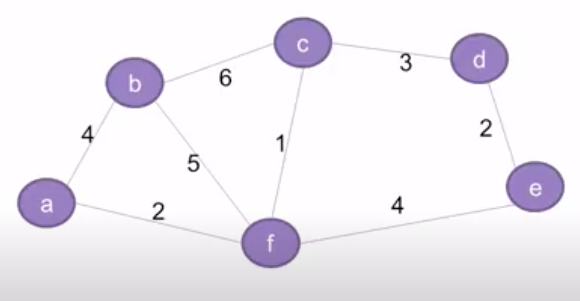

Supongamos que tenemos el siguiente grafo, se ve cual es el que tiene la arista de menor peso en este caso serian los nodos C, F.

Vemos la siguiente arista de menor peso la cual seria A, F y D, E, en este caso seleccionamos A, F.

Repetimos el proceso anterior y seleccionamos la arista D, E que es la siguiente de menor peso.

Vemos cual es la siguiente que es la C, D.

Por ultimo seleccionamos la arista A, B, no podemos seleccionar mas aristas ya que se formaria un ciclo.

Por lo tanto vemos que nuestro arbol recubridor minimo resultaria: [('C', 'F', 1), ('A', 'F', 2), ('D', 'E', 2), ('C', 'D', 3), ('A', 'B', 4)]

# 3. Correctitud

Sea $G$ un grafo ponderado conectado. Sea $H$ $=$ $T_m$ el subgrafo producido por el algoritmo. Por construcción es claro que $T_0$, $T_1$, $...$,$T_m$ $=$ $H$ son todos acíclicos: Por lo tanto $H$ es bosque.

*Afirmación*: $H$ está conectado. Probaremos esto usando el argumento de la contradicción.

Suponga que $H$ es desconectado. Entonces hay al menos dos árboles desconectados en el bosque $H$. Como $G$ está conectado, hay una secuencia de aristas $e_1$, $e_2$,$...$,$e_n$ $\notin$ $H$ = $T_m$ que conectan los vértices de un par de árboles desconectados en el bosque. Entonces $T_m$ $\cup$ {$e_1$} es acíclico, lo cual es una contradicción ya que el algoritmo no se detendría en $i$$=$$m$.

Entonces $H$ es un árbol de expansión de $G$. Basta mostrar que es mínimo.

Probamos lo siguiente por inducción: si $F$ es el conjunto de aristas elegido en cualquier etapa del algoritmo, entonces hay un árbol de expansión mínimo que contiene $F$.

*Nota:* Esta prueba por inducción completa la prueba de corrección ya que en algún momento $F$ es $H$.

*Caso base:* Claramente, la proposición es verdadera si $F$ está vacía: cualquier árbol de expansión mínimo servirá.

Ahora suponga que $F$ contiene $n$ $\geq$ $0$ aristas y la proposición es verdadera. Sea $T$ $=$ $(V,E)$ un árbol de expansión mínimo que contiene $F$.

Si $E$ $=$ $F$ entonces hemos terminado. Así que suponga que $F$ $\subset$ $E$ y, por lo tanto, el algoritmo no está terminado. Necesitamos mostrar que cuando el algoritmo agrega otra arista $e$ a $F$, hay un árbol de expansión mínimo que contiene $F$ $\cup$ {$e$}.

Si la siguiente arista $e$ agregada por el algoritmo está en $E$, entonces la proposición es verdadera para $F$ $\cup$ {$e$} y estaríamos listos por inducción.

De lo contrario, hay un ciclo $C$ en $T$ $\cup$ {$e$}, el nuevo borde agregado entre los vértices de un árbol crea un ciclo, además, hay otra arista $e'$ $\in$ $C$ tal que $e'$ no está en $F$, ya que $F$ $\cup$ {$e$} debe ser acíclico, dado que $e'$ no fue elegido por el algoritmo, $peso(e')$ $\geq$ $peso(e)$.

Entonces $T'$ $=$ ($V$, ($E$ $\setminus${$e'$}) $\cup$ {$e$}) es un árbol de expansión. La suma de los pesos en $T'$ es la suma de los pesos en $T$ más $(peso(e) - peso(e'))$ $\leq$ $0$.

Entonces $T'$ tiene una suma de pesos que es menor o igual que la suma de pesos en $T$. Pero $T$ tiene un peso mínimo; entonces $T'$ es un $MST$. Entonces terminamos por inducción ya que $T'$ es un árbol de expansión mínimo que contiene $F$ $\cup$ {$e$}.`

# **4. TIEMPO DE EJECUCIÓN**

Podemos separar el algoritmo en *implementación directa* y *con la estructura de datos Union-Find*

**1. Implementación directa**

En primer lugar, el algoritmo ordena los arcos de forma decreciente según su costo asociado, esta operación tiene un costo de **O(E log V)**, siendo E el número de arcos y V el de nodos.

Para el loop que agrega arcos a nuestra solución:

- El ciclo realiza E iteraciones. Cada iteración es responsable de revisar si el arco $e = (u,v)$ puede ser agregado a la solución y que tenemo hasta el momento (no tiene un ciclo).

- La agregación de un arco $e$ solamente crea un ciclo si **ya existe un camino de u a v**. Esta operación puede ser realizada en tiempo lineal usando cualquier algoritmo de búsqueda en grafos empezando desde **v**. Al existir **V** nodos a considerar en este análisis, dentro del ciclo tenemos un aporte de O(V).

Por lo tanto, el tiempo de ejecución del algoritmo implementado de forma directa es de **O(VE)**.

**2. Implementación Union-Find**

En esta implementación se analiza paso a paso el procedimiento para determinar el tiempo de ejecución:

$$T_{sort}(E) + O(V) * T_{Make-Set} + O(E)(T_{Find} + T_{Union}) = O(Elog(E)+E_α(V))$$

Análisis del tiempo de ejecución del algoritmo:

- La ordenación de las aristas lleva tiempo **O(E log(E))**
- Tras la ordenación, iteramos por todas las aristas E y aplicamos el algoritmo de union-find.
- Las operaciones de búsqueda y unión pueden tardar como máximo **O(log(V)).
- Por lo tanto, la complejidad total es de **O(Elog(E) + Elog(V))**.
- El valor de E puede ser como máximo O(2V), por lo que O(log(V)) es O(log(E)) igual. 

Por lo tanto, la complejidad temporal global de la implementación union-find es **O(Elog(E)) u O(Elog(V))**.

# 5. Experimentos

## Kruskal VS Prim

In [13]:
import math


def prim(n, edges):
    g = [[] for i in range(n)]
    for u, v, w in edges:
        g[u].append((v, w))
        g[v].append((u, w))

    d = [float('inf') for i in range(n)]
    b = [False for i in range(n)]
    d[0] = 0
    ans = 0

    for i in range(n):
        min_dist = float('inf')
        k = 0
        for j in range(n):
            if not b[j] and min_dist > d[j]:
                min_dist = d[j]
                k = j

        b[k] = True
        ans += min_dist

        for j, w in g[k]:
            if not b[j] and d[j] > w:
                d[j] = w

    return ans

In [16]:
import matplotlib.pyplot as plt
import datetime
from timeit import repeat
import random

x=[]; y=[]; z=[]

for n in range(5,500):

  nodes = list("ABCDEF")
  edges = [ ("A", "B", 4), ("A", "F", 2), ("B", "F", 5), ("B", "C", 6), ("C", "F", 1), ("C", "D", 3), ("D", "E", 2), ("E", "F", 4)]

  t = repeat(setup="from __main__ import prim", stmt=f"prim({nodes, edges})", repeat=1, number=10)
  v = repeat(setup="from __main__ import kruskal", stmt=f"kruskal({nodes, edges})", repeat=1, number=10)
  x.append(n)
  y.append(t)
  z.append(v)


plt.plot(x,y,z)
plt.legend(["Prim","Kruskal"])

plt.xlabel('n')
plt.ylabel('Tiempo de ejecucion')
plt.show()

TypeError: ignored

## Analisis de resultados

Podemos ver que el algoritmo de el tiempo de ejecucion de Kruskal es mejor para muchos nodos, pero Prim para pocos nodos.